In [151]:
#Numpy, Pandas, Seaborn, Matplotlib
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
%matplotlib inline

#import sklearn libraries
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report
from sklearn.model_selection import train_test_split

#import tensorflow keras library
from tensorflow import keras
from keras import Sequential
from keras.layers.core import Dense
from keras.utils import plot_model

In [152]:
df = pd.read_csv('ready_data.csv')
df.head(3)

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,Red,1,5,0,4,0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,Red,1,5,0,3,0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,Red,0,3,0,3,0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0


In [153]:
sample3 = df.sample(frac=0.01, replace=True, random_state=1)
sample3.shape

(36, 160)

In [154]:
def title(row):
    if (row['Winner']=='Red'):
        val = 1
    else:
        val = 0
    return val

In [155]:
df['Winner'] = df.apply(title, axis=1)
df['Winner'].nunique()

2

In [156]:
df.head(3)

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,1,1,5,0,4,0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,1,1,5,0,3,0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,1,0,3,0,3,0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0


In [157]:
# Check how many records and attributes there are
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))
df.head()

Number of instances = 3592
Number of attributes = 160


,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
0,1,1,5,0,4,0,9.200000,6.000000,0.200000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,1,1,5,0,3,0,14.600000,9.100000,11.800000,7.300000,...,0,0,1,0,0,0,0,0,1,0
2,1,0,3,0,3,0,15.354839,11.322581,6.741935,4.387097,...,0,0,1,0,0,0,0,1,0,0
3,0,0,3,0,4,0,17.000000,14.000000,13.750000,11.000000,...,0,0,0,0,0,1,0,1,0,0
4,0,0,3,0,1,0,17.000000,14.500000,2.500000,2.000000,...,0,0,0,0,1,0,0,0,1,0


In [158]:
df.isnull().sum()

Winner                   0
title_bout               0
no_of_rounds             0
B_current_lose_streak    0
B_current_win_streak     0
                        ..
B_Stance_Switch          0
R_Stance_Open Stance     0
R_Stance_Orthodox        0
R_Stance_Southpaw        0
R_Stance_Switch          0
Length: 160, dtype: int64

In [159]:
# No duplicates!
print("the number of duplicates is %d" % (df.duplicated().sum()))

the number of duplicates is 0


In [160]:
df.dropna(inplace = True)

In [161]:
y = df['Winner']
x = df.drop('Winner', axis = 1)

In [162]:
df.shape

(3592, 160)

In [163]:
print(x.shape)
print(y.shape)

(3592, 159)
(3592,)


In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


Text(0, 0.5, 'Accuracy')

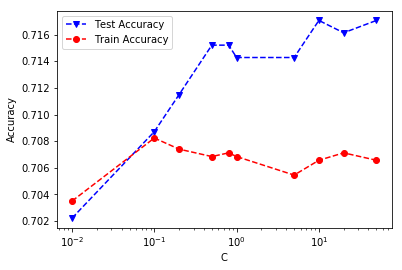

In [165]:
from sklearn.linear_model import LogisticRegression


C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param, solver='liblinear')
    clf.fit(x,y)
    log_reg_pred = clf.predict(x_test)
    log_reg_pred_train = clf.predict(x)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(y_test, log_reg_pred))
    LRtrainAcc.append(accuracy_score(y,log_reg_pred_train))
    
    

plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

In [166]:
from sklearn import tree
clf4 = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf4 = clf4.fit(x, y)

In [167]:
import graphviz 
dot_data = tree.export_graphviz(clf4, out_file=None) 
graph = graphviz.Source(dot_data)

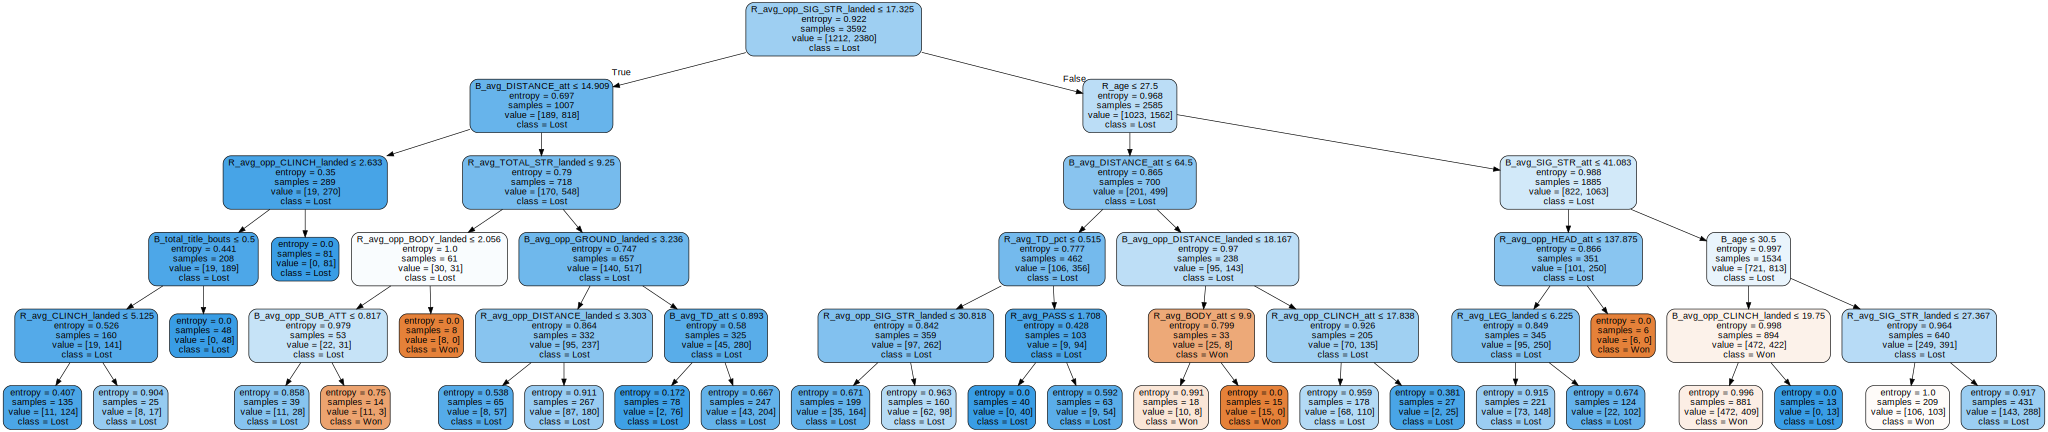

In [168]:
dot_data = tree.export_graphviz(clf4, out_file=None, 
                      feature_names=x.columns,  
                      class_names=['Won','Lost'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

[1 1 1 ... 0 1 0]
[1 1 0 ... 1 1 0]
[1 1 0 ... 0 1 1]


Text(0, 0.5, 'Accuracy')

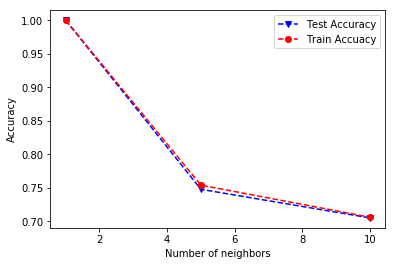

In [169]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf2.fit(x,y)
    knn_pred = clf2.predict(x_test)
    knn_pred_train = clf2.predict(x)
    print(knn_pred)
    testAcc.append(accuracy_score(y_test, knn_pred))
    trainAcc.append(accuracy_score(y,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [170]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(x,y)
NB_pred = clf_NB.predict(x_test)
print(NB_pred)

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, NB_pred)))

[1 1 0 ... 0 0 1]
Accuracy on test data is 0.58


In [171]:
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)


In [172]:
X,Y = to_xy(df,'Winner')

In [173]:
model = Sequential()
model.add(Dense(159, input_dim = X.shape[1], activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(240, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics = ['accuracy'])
model.fit(X,Y,verbose=2, epochs=120)

Epoch 1/120
 - 0s - loss: 3.4315 - accuracy: 0.5913
Epoch 2/120
 - 0s - loss: 1.4333 - accuracy: 0.6033
Epoch 3/120
 - 0s - loss: 0.8855 - accuracy: 0.6091
Epoch 4/120
 - 0s - loss: 0.7135 - accuracy: 0.6364
Epoch 5/120
 - 0s - loss: 0.7483 - accuracy: 0.6269
Epoch 6/120
 - 0s - loss: 0.7075 - accuracy: 0.6320
Epoch 7/120
 - 0s - loss: 0.6727 - accuracy: 0.6489
Epoch 8/120
 - 0s - loss: 0.6643 - accuracy: 0.6417
Epoch 9/120
 - 0s - loss: 0.6307 - accuracy: 0.6506
Epoch 10/120
 - 0s - loss: 0.6090 - accuracy: 0.6648
Epoch 11/120
 - 0s - loss: 0.6188 - accuracy: 0.6565
Epoch 12/120
 - 0s - loss: 0.6039 - accuracy: 0.6662
Epoch 13/120
 - 0s - loss: 0.6111 - accuracy: 0.6645
Epoch 14/120
 - 0s - loss: 0.6028 - accuracy: 0.6651
Epoch 15/120
 - 0s - loss: 0.5929 - accuracy: 0.6740
Epoch 16/120
 - 0s - loss: 0.6056 - accuracy: 0.6534
Epoch 17/120
 - 0s - loss: 0.5959 - accuracy: 0.6659
Epoch 18/120
 - 0s - loss: 0.6012 - accuracy: 0.6690
Epoch 19/120
 - 0s - loss: 0.5909 - accuracy: 0.6693
Ep

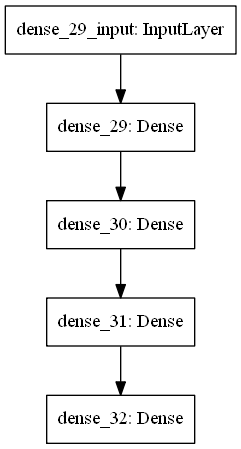

In [174]:
plot_model(model, to_file='model.png')

In [175]:
pred = model.predict(x_test)
print(pred[0])

[0.2015281  0.79847187]


In [176]:
pred = np.argmax(pred, axis=1)

In [177]:
#true = np.argmax(y_test, axis=1)

In [178]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Plotting confusion matrix


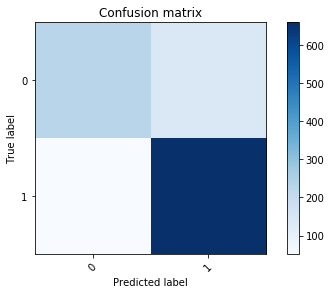

              precision    recall  f1-score   support

           0       0.82      0.62      0.71       368
           1       0.83      0.93      0.87       710

    accuracy                           0.82      1078
   macro avg       0.82      0.78      0.79      1078
weighted avg       0.82      0.82      0.82      1078



In [179]:
# Compute confusion matrix
cm = confusion_matrix(y_test, pred)
print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, ['0','1'])
plt.show()

print(classification_report(y_test, pred))